<a href="https://colab.research.google.com/github/hashPhoeNiX/ColabNotebooks/blob/master/FastAi_V2_DataBlock_Tfms_with_staintools_albumentations_kornia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install albumentations --upgrade

     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 37.6MB 85kB/s 
     |████████████████████████████████| 952kB 43.0MB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 17.9MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
!pip install kornia --upgrade

     |████████████████████████████████| 225kB 17.9MB/s 


In [4]:
!pip install staintools

  Created wheel for staintools: filename=staintools-2.1.2-cp37-none-any.whl size=14072 sha256=4ca0edca49a474659d19ca68bc86693663364e9a46b373b8ff8a02b7bca93395
  Stored in directory: /root/.cache/pip/wheels/76/01/f8/81c62c374358f5baf8b278b5c57ab13534eb8f811bff1ddcb8
Successfully built staintools


In [5]:
!pip install spams

     |████████████████████████████████| 1.6MB 15.5MB/s 
  Created wheel for spams: filename=spams-2.6.2.5-cp37-cp37m-linux_x86_64.whl size=4516359 sha256=0c590dd8079cbbefa61a02949497ea00f6f9497d9b5fade4756492b3890bfcd5
  Stored in directory: /root/.cache/pip/wheels/ba/6f/08/d9d013b9e3ac5ce8f10e67573f38a366c907f99299d5d7711a
Successfully built spams


In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
# downloading the dataset from kaggle https://www.kaggle.com/c/histopathologic-cancer-detection/data
# cookies.txt is the cookies downloaded from my kaggle page
# download the cookies.txt add-ons for your browser
!wget -x --load-cookies cookies.txt "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614287263&Signature=AqmIbC6wvB6AUhcYFGhUpgc4uyreCXDlyWGtyLFoCO7kJ21V9QgDtQH2%2FK%2BZLXik4T%2Frxlmi4HAkA5VEgV0a978i4rFEPchinx9CK1nWHhhHeOGg8dD4Q3%2BnUb%2FDurKQF0HwCjw2FxUGnKQL2NmTz%2BibZQ2C4ItNj49yYrx%2BHgJkJcwi6nvVRi%2FKCsOo1XU8I%2B%2BQ8RlCK956fsz%2FgzP%2BJn1uUUt%2B%2BYVoZVLiARqpjcTx5on5Ut27LlTDJ2i9bzU0L5ZSmF%2BvVhDT%2FNglRU93gJ%2FSAFS6RzWT7Sas6GTeEo3blTVvLx4VjwI7KSBwlcC0Q8O9tlg%2B7M7QBaTxHx%2Fl%2Fw%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip" -O data.zip

Cannot open cookies file ‘cookies.txt’: No such file or directory
--2021-02-25 12:46:23--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614287263&Signature=AqmIbC6wvB6AUhcYFGhUpgc4uyreCXDlyWGtyLFoCO7kJ21V9QgDtQH2%2FK%2BZLXik4T%2Frxlmi4HAkA5VEgV0a978i4rFEPchinx9CK1nWHhhHeOGg8dD4Q3%2BnUb%2FDurKQF0HwCjw2FxUGnKQL2NmTz%2BibZQ2C4ItNj49yYrx%2BHgJkJcwi6nvVRi%2FKCsOo1XU8I%2B%2BQ8RlCK956fsz%2FgzP%2BJn1uUUt%2B%2BYVoZVLiARqpjcTx5on5Ut27LlTDJ2i9bzU0L5ZSmF%2BvVhDT%2FNglRU93gJ%2FSAFS6RzWT7Sas6GTeEo3blTVvLx4VjwI7KSBwlcC0Q8O9tlg%2B7M7QBaTxHx%2Fl%2Fw%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.12.240, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting re

In [9]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c546059bd262cbe954dfdba24dc0d67f598b0.tif  
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from fastai.vision.all import *
from fastai.vision import *
from fastai import *
from torchvision.models import *

import staintools
from albumentations import *
from albumentations.pytorch.transforms import ToTensorV2
# import kornia
import kornia as K

In [42]:
# staintools normalizer for item transform
class stainTransform(DisplayedTransform):
    global normalizer
    split_idx = 0
    # used a slide for the StainNormalizer fit target
    # target = cv.imread('train/e9f5fdd1a7187fc5a6669ba48e8ff070406f7e73.tif')
    # target = cv.cvtColor(target, cv.COLOR_BGR2RGB)
    target = staintools.read_image('/content/target_histomiks.png')
    target = staintools.LuminosityStandardizer.standardize(target)
    normalizer = staintools.StainNormalizer(method='vahadane')
    normalizer.fit(target)
    def __init__(self, norm,**kwargs):
        super().__init__(**kwargs)
        self.norm = norm
    def encodes(self, to_transform:PILImage):
        img = cv.cvtColor(np.array(to_transform, dtype=np.uint8), cv.COLOR_BGR2RGB)
        img = self.norm.transform(img)
        out = PILImage.create(img)
        # print(f'{"#"*5} stain normalizer {"#"*5}')
        return out

In [16]:
alb = Compose([
            OneOf([
                    IAASharpen(alpha=(0.2, 0.8), lightness=(0.5, 1.0)),
                    IAAEmboss(alpha=(0.2, 0.8), strength=(0.2, 0.7)),
                    JpegCompression(quality_lower=30, quality_upper=90),
                    MotionBlur(blur_limit=5),
                    ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=0.5),
                    RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2)
            ], p=1.0),
            OneOf([
                    OpticalDistortion(distort_limit=0.05, shift_limit=0.05, interpolation=1, border_mode=4),
                    GridDistortion(num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4),
                    IAAPiecewiseAffine(scale=(0.03, 0.05), nb_rows=4, nb_cols=4, order=1, cval=0, mode='constant'),
                    Cutout(num_holes=5, max_h_size=20, max_w_size=20),
                    CoarseDropout(max_holes=5, max_height=20, max_width=20, min_holes=2),
                    Downscale(scale_min=0.8, scale_max=0.8, interpolation=0)
            ], p=1.0),
            CLAHE(clip_limit=2, p=1.0),
            RandomBrightnessContrast(brightness_limit=(-0.4,0.4), contrast_limit=0.2, p=1.0),
            HueSaturationValue(hue_shift_limit=60, sat_shift_limit=70, val_shift_limit=60, p=1.0),
            ToTensorV2()
    ])

In [17]:
class Albumentations(DisplayedTransform):
    split_idx, order = 0, 2
    def __init__(self, train_aug): 
        self.train_aug = train_aug
        self._pipe = Pipeline([ToTensor()])
        store_attr()
    def encodes(self, img: PILImage):
        aug_img = self.train_aug(image=np.array(img))
        out = TensorImage(aug_img['image'])
        # print(f"{'*'*5} albumentations transform {'*'*5}")
        return out

In [18]:
# transformPipeline = Albumentations(alb)

In [19]:
df = pd.read_csv('train_labels.csv')
df['id'] = df['id'] + '.tif'
df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [20]:
path = Path('train')
 
get_x = lambda df: path/df['id']
get_y = lambda df: df['label']

In [21]:
class KorniaWrapper(RandTransform):
    order = 10
    def __init__(self, kornia_tfm=None,p=1., **kwargs):
        super().__init__(p=p)
        self.tfm = kornia_tfm
        self.input_kwargs = kwargs
        self.call_kwargs  = dict.fromkeys(kwargs)
        self._pipe = Pipeline([ToTensor(), IntToFloatTensor()])
        self.process_tfm()
    
    def before_call(self, b, split_idx, verbose=False):
        'Compute `p` of applying transform, process input kwargs if applicable'
        self.do = self.p==1. or random.random() < self.p
        for arg,value in self.input_kwargs.items():
            if hasattr(value, '__call__'): self.call_kwargs[arg] = value()
            else: self.call_kwargs[arg] = value
    
    def process_tfm(self):
        'Process the input `kornia_tfm` argument and make it callable'
        if hasattr(self.tfm, 'forward') and hasattr(self.tfm, '__iter__'):
            pass                                ## -- nn.Sequential

        elif hasattr(self.tfm, 'forward') and type(self.tfm) is not type:      
            self.tfm = nn.Sequential(self.tfm)  ## -- Kornia module (called)
        
        elif hasattr(self.tfm, 'forward') and type(self.tfm) is type:      
            self.tfm = nn.Sequential(self.tfm)  ## -- Kornia module (uncalled)
            pass
        
        elif isinstance(self.tfm, list):
            self.tfm = nn.Sequential(*self.tfm) ## -- list of Kornia Modules
    
    def _encode(self, o:TensorImage): 
        # print(f'encodes {o.__class__}')
        return TensorImage(self.tfm(o, **self.call_kwargs)) if self.do else o
    def encodes(self, o:torch.Tensor): return self._encode(o)
    def encodes(self, o:Image.Image):  return self._encode(self._pipe(PILImage(o)))
    def encodes(self, o:TensorImage):  return self._encode(o)
    def encodes(self, o:PILImage):     return self._encode(self._pipe(o))
    def encodes(self, o:(str,Path)):   return self._encode(self._pipe(PILImage.create(o)))
    def encodes(self, o:(TensorCategory,TensorMultiCategory)): return o
    
    def __repr__(self): return self.tfm.__repr__()

In [22]:
# for testing the korniawrapper

StyleTfm    = KorniaWrapper(K.filters.MedianBlur(kernel_size=(5,5)), p=1.0)

In [23]:
# wrap the kornia augmentations first using the korniaWrapper class created

perspective = KorniaWrapper(K.augmentation.RandomPerspective())
solarize = KorniaWrapper(K.augmentation.RandomSolarize())
posterize = KorniaWrapper(K.augmentation.RandomPosterize())
sharpness = KorniaWrapper(K.augmentation.RandomSharpness())
mixup = KorniaWrapper(K.augmentation.RandomMixUp())
cutmix = KorniaWrapper(K.augmentation.RandomCutMix(height=96, width=96))

In [24]:
tfms_gpu = ([perspective, solarize, posterize, #StyleTfm, #kornia transforms
RandomResizedCropGPU(96), #fastai
RandomErasing(), #CutOut fastai
Warp(), #OpticalDistortion fastai
Brightness(),# HSVTfm(), #RandomBrightnessContrast #HueSaturationValue fastai
ToTensor()])

In [43]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(),
                   get_x=get_x,
                   get_y=get_y,
                   item_tfms= [vision.augment.Resize(96), Albumentations(alb), stainTransform(normalizer)],
                   batch_tfms = tfms_gpu)

In [44]:
dls = dblock.dataloaders(df)

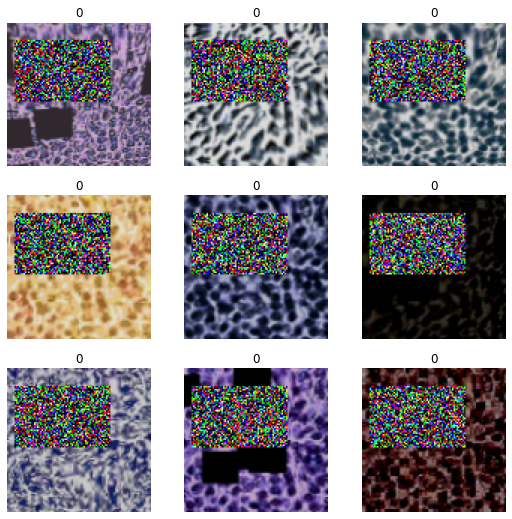

In [45]:
dls.show_batch(unique=True)

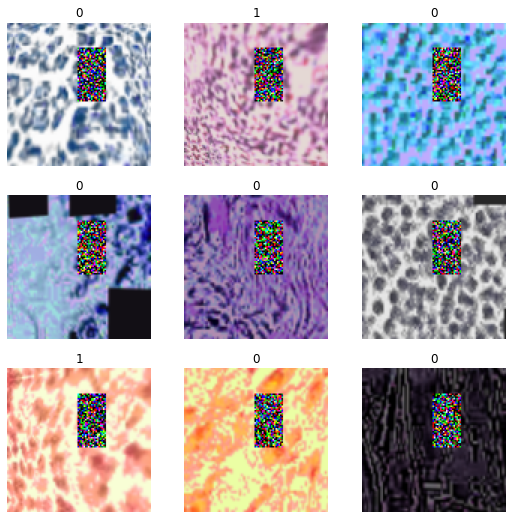

In [46]:
dls.show_batch()

In [47]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 1e-1)

epoch,train_loss,valid_loss,accuracy,time


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5eb4982d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5eb4982d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeo

epoch,train_loss,valid_loss,accuracy,time
0,0.807841,0.767912,0.600773,47:07
1,0.595105,3916.077148,0.538371,46:51


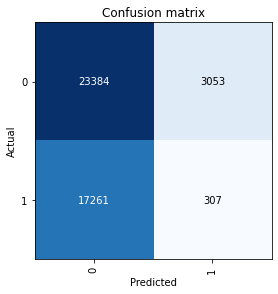

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()